In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Import my code

In [2]:
import sys
sys.path.insert(0,'..')

from boltzmann_generator import BoltzmannGenerator
import energy_models.bivariate_normal_distribution as bivariate_normal

In [3]:
bivariate_normal_model = bivariate_normal.BivariateNormalDistribution()

Used params:
sigma_x: 3 sigma_y: 2 rho: 0.9 

Covariance matrix of the distribution:
[[9.  5.4]
 [5.4 4. ]]


# Sample training set

In [4]:
def plot_distribution(samples):
    x = samples[:, 0]
    y = samples[:, 1]
    fig = plt.figure(figsize=[8, 6])
    plt.hist2d(
        x, y, 
        bins=(100, 100),
        range=[[-10, 10], [-7.5, 7.5]],
        cmap=plt.cm.jet
    )
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return fig

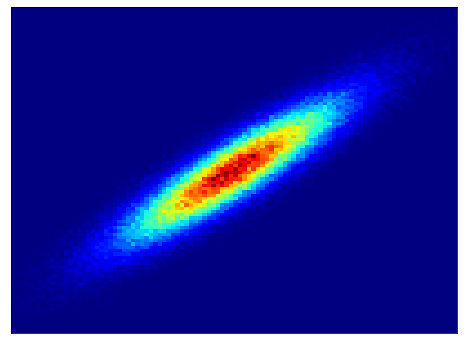

In [5]:
size_of_training_set = 200000
training_dataset = bivariate_normal_model.produce_train_dataset(size_of_training_set)
fig = plot_distribution(training_dataset)

fig.tight_layout()
fig.savefig("../results/trivial_tests/bivariate_training_dataset.png", dpi=300)

# Create and train Boltzmann generator

In [6]:
bg = BoltzmannGenerator(
    layers='R'*2, 
    energy_model=bivariate_normal_model,
)

Layers of invertible NN: <RR>
< 2 0 0
R 1 1 0
R 1 1 0
> 1 1 0


In [7]:
                 # w_ML, w_KL, iter, b_size, lr
training_shedule = [[1,    0,   30,   500, 5e-4],
                    [1,    1,  250,  2000, 1e-4]]

Should I continue in training? (press Enter)
Iteration 0/30: loss: 6.39 ML_loss: 6.39 
Iteration 10/30: loss: 3.26 ML_loss: 3.26 
Iteration 20/30: loss: 3.08 ML_loss: 3.08 


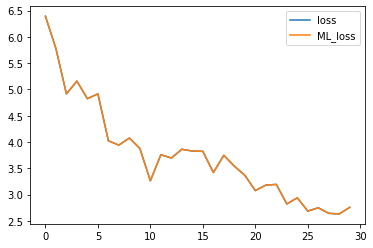

Should I continue in training? (press Enter)
Iteration 0/250: loss: 2.90 ML_loss: 2.54 KL_loss: 0.36 
Iteration 10/250: loss: 2.86 ML_loss: 2.51 KL_loss: 0.34 
Iteration 20/250: loss: 2.82 ML_loss: 2.50 KL_loss: 0.32 
Iteration 30/250: loss: 2.75 ML_loss: 2.44 KL_loss: 0.31 
Iteration 40/250: loss: 2.76 ML_loss: 2.46 KL_loss: 0.30 
Iteration 50/250: loss: 2.60 ML_loss: 2.32 KL_loss: 0.28 
Iteration 60/250: loss: 2.56 ML_loss: 2.28 KL_loss: 0.28 
Iteration 70/250: loss: 2.54 ML_loss: 2.30 KL_loss: 0.24 
Iteration 80/250: loss: 2.50 ML_loss: 2.27 KL_loss: 0.23 
Iteration 90/250: loss: 2.54 ML_loss: 2.32 KL_loss: 0.22 
Iteration 100/250: loss: 2.33 ML_loss: 2.16 KL_loss: 0.17 
Iteration 110/250: loss: 2.25 ML_loss: 2.10 KL_loss: 0.15 
Iteration 120/250: loss: 2.24 ML_loss: 2.10 KL_loss: 0.14 
Iteration 130/250: loss: 2.19 ML_loss: 2.08 KL_loss: 0.10 
Iteration 140/250: loss: 2.19 ML_loss: 2.09 KL_loss: 0.09 
Iteration 150/250: loss: 2.15 ML_loss: 2.06 KL_loss: 0.08 
Iteration 160/250: los

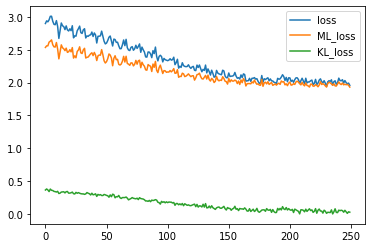

In [8]:
loss_vals = {"loss": np.array([]), "ML_loss": np.array([]), "KL_loss": np.array([])}

for training_variables in training_shedule:
    input("Should I continue in training? (press Enter)")
    current_loss_vals = bg.train(training_dataset, 
                                 weight_ML = training_variables[0],
                                 weight_KL = training_variables[1],
                                 iterations = training_variables[2],
                                 batch_size = training_variables[3],
                                 lr = training_variables[4])
    
    for loss_name in current_loss_vals:
        loss_vals[loss_name] = current_loss_vals[loss_name]
        
        plt.plot(loss_vals[loss_name], label=loss_name)
        
    plt.legend(loc='upper right')
    plt.show()

# Validate results

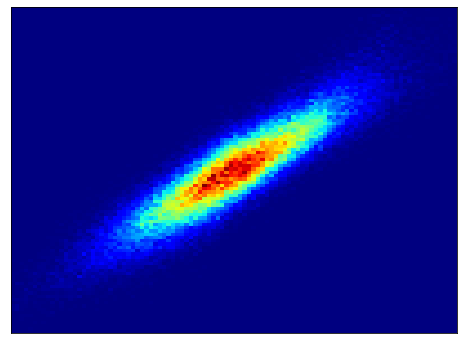

In [9]:
n_samples = 100000
sample = bg.sample(n_samples)[1]
fig = plot_distribution(sample)

fig.tight_layout()
fig.savefig("../results/trivial_tests/bivariate_sampled.png", dpi=300)

In [10]:
cov = np.dot(sample.T, sample)
print("Achieved covariance matrix:")
print(cov/n_samples)
print()
print("Wanted covariance_matrix:")
print(bivariate_normal_model.cov)

Achieved covariance matrix:
[[8.79023062 5.30805125]
 [5.30805125 3.96364813]]

Wanted covariance_matrix:
[[9.  5.4]
 [5.4 4. ]]
